# Частина друга: Аналіз файлів
Проведіть аналіз файлу [2017_jun_final.csv](https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view). Файл містить результати опитування розробників у червні 2017 року.

Необхідно виконати:

* Прочитайте файл [2017_jun_final.csv](https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view) за допомогою методу `read_csv`
* Прочитайте отриману таблицю, використовуючи метод `head`
* Визначте розмір таблиці за допомогою методу `shape`
* Визначте типи всіх стовпців за допомогою `dataframe.dtypes`
* Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи `isnull` та `sum`)
* Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
* Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
* Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
* Визначте новий розмір таблиці за допомогою методу `shape`
* Створіть нову таблицю `python_data`, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування **Python**
* Визначте розмір таблиці `python_data` за допомогою методу `shape`
* Використовуючи метод `groupby`, виконайте групування за стовпчиком "Посада"
* Створіть новий `DataFrame`, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу `agg` і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
* Створіть функцію `fill_avg_salary`, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу `apply` та створіть новий стовпчик "avg"
* Створіть описову статистику за допомогою методу `describe` для нового стовпчика.
* Збережіть отриману таблицю в `CSV` файл

# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import copy
from google.colab import drive

# HTML Parsing

In [3]:
URL = "https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view"
file_id=URL.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
base_df = pd.read_csv(dwn_url)
base_df

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,Manual QA,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,...,False,средний,"Android,Desktop Applications",12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700,NaN,QA
8700,8701,Marketing,NaN,NaN,0.5,0.5,400,120,Киев,до 50 человек,...,False,ниже среднего,eCommerce,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,NaN
8701,8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львов,до 10 человек,...,False,выше среднего,"Веб-разработка,Корпоративные системы",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV
8702,8703,Team lead,NaN,NaN,6,4,2600,0,Днепр,свыше 1000 человек,...,False,продвинутый,Финансы и банки,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600,NaN,PM


# Tasks

In [ ]:
# Прочитайте отриману таблицю, використовуючи метод head

base_df.head(5)

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [ ]:
# Визначте розмір таблиці за допомогою методу shape

base_df.shape

(8704, 25)

In [ ]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes

base_df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [ ]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

tmp = base_df.isnull().sum() / len(base_df) * 100
tmp.round(1)

N                                    0.0
Должность                            0.0
Язык.программирования               44.2
Специализация                       82.9
Общий.опыт.работы                    0.0
Опыт.работы.на.текущем.месте         0.0
Зарплата.в.месяц                     0.0
Изменение.зарплаты.за.12.месяцев     0.0
Город                                0.0
Размер.компании                      0.0
Тип.компании                         0.0
Пол                                  0.0
Возраст                              0.0
Образование                          0.0
Университет                          4.1
Еще.студент                          0.0
Уровень.английского                  0.0
Предметная.область                   2.6
Дата.заполнения                      0.0
User.Agent                           0.0
exp                                  0.0
current_job_exp                      0.0
salary                               0.0
Валюта                              99.9
cls             

In [ ]:
# Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
saved_column = base_df["Язык.программирования"]

tmp = copy.deepcopy(base_df)

tmp.dropna(axis=1, inplace=True)
tmp.insert(2, saved_column.name, saved_column.values)

# Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
tmp.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [ ]:
# Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

tmp = copy.deepcopy(base_df)
tmp.dropna(axis=0, inplace=True)

# Визначте новий розмір таблиці за допомогою методу shape
tmp.shape

(0, 25)

In [95]:
# Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

python_data = copy.deepcopy(base_df)
column_for_check = "Язык.программирования"
search_value = "Python"

python_data = python_data[
  python_data[column_for_check].isin([search_value])
]

# Визначте розмір таблиці python_data за допомогою методу shape

python_data.shape

(207, 25)

In [16]:
# Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

tmp = copy.deepcopy(base_df).groupby("Должность", sort=True)

# Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

new_df = tmp.agg({"Зарплата.в.месяц": ["min", "max"]}).astype(int)

new_df

Зарплата.в.месяц       
                                                        min    max
Должность                                                         
Business analyst                                        200   5000
DBA                                                     380   6000
Data Scientist / Data Analyst                           150   8000
Designer                                                100   4000
DevOps                                                  194  10000
Director of Engineering / Program Director             1500  34000
ERP / CRM                                               100   6000
Game designer                                           150   6800
HR                                                      100   7000
HTML coder                                              154   3000
Junior QA engineer                                       96   2000
Junior Software Engineer                                 75   2600
Marketing                                               100   4000
Product Manager                                         250   5000
Project manager                                         190   8000
QA Tech Lead                                            430   6000
QA engineer                                             150   2900
Research Engineer                                       114   4000
Sales manager                                           120   2300
Scrum Master                                            370   4500
Security Specialist                                     300   4000
Senior Project Manager / Program Manager                200   9100
Senior QA engineer                                      400   6000
Senior Software Engineer                                350   9200
Software Engineer                                       100   7000
Support                                                 138   3650
Sysadmin                                                 90   3000
System Architect                                        400  10000
Talent Researcher                                       100   1700
Team lead                                               300   7000
Technical Lead                                          500  18000
Technical writer                                        200   3000

In [36]:
# Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

tmp = copy.deepcopy(base_df).groupby(["Должность"], sort=True)

# Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

column_for_calculate = "Зарплата.в.месяц"

new_df = tmp[column_for_calculate].agg(["min", "max"])

# Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

def fill_avg_salary(series_data: pd.Series):
  return series_data.mean()

tmp = new_df.apply(fill_avg_salary, axis=1)

new_df['avg'] = tmp.values.astype(int)

new_df.reset_index()

,Должность,min,max,avg
0,Business analyst,200,5000,2600
1,DBA,380,6000,3190
2,Data Scientist / Data Analyst,150,8000,4075
3,Designer,100,4000,2050
4,DevOps,194,10000,5097
5,Director of Engineering / Program Director,1500,34000,17750
6,ERP / CRM,100,6000,3050
7,Game designer,150,6800,3475
8,HR,100,7000,3550
9,HTML coder,154,3000,1577


In [18]:
# Створіть описову статистику за допомогою методу describe для нового стовпчика.

new_df[[('Зарплата.в.месяц', 'avg')]].describe()

,Зарплата.в.месяц
,avg
count,32.000000
mean,3449.218750
std,3093.896184
min,900.000000
25%,1820.500000
50%,2837.500000
75%,3756.250000
max,17750.000000


In [ ]:
# Збережіть отриману таблицю в CSV файл

drive.mount('drive')

new_df.to_csv('data.csv')

!cp data.csv "drive/My Drive/"

MessageError: ignored

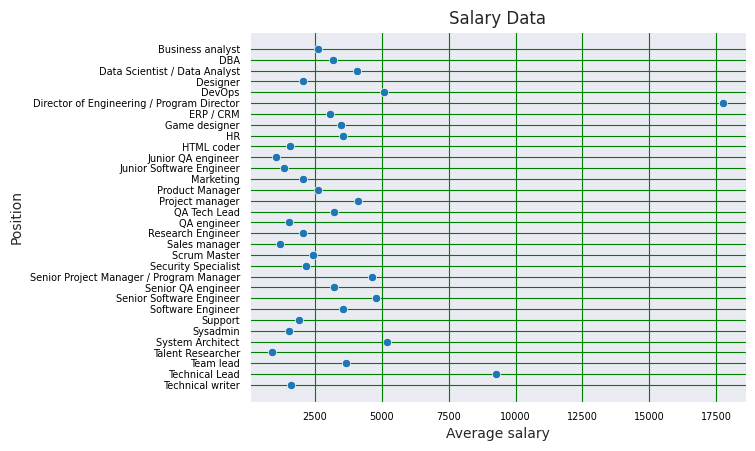

In [76]:
sns.set_style("darkgrid")
plot = sns.scatterplot(x='avg', y='Должность', data=new_df)
plot.set(title='Salary Data')

plot.set_xlabel('Average salary', fontsize=10);
plot.set_ylabel('Position', fontsize=10);

plot.tick_params(
  colors='black',
  grid_color='green',
  labelsize=7
)

[Text(0.5, 1.0, 'Salary Data')]

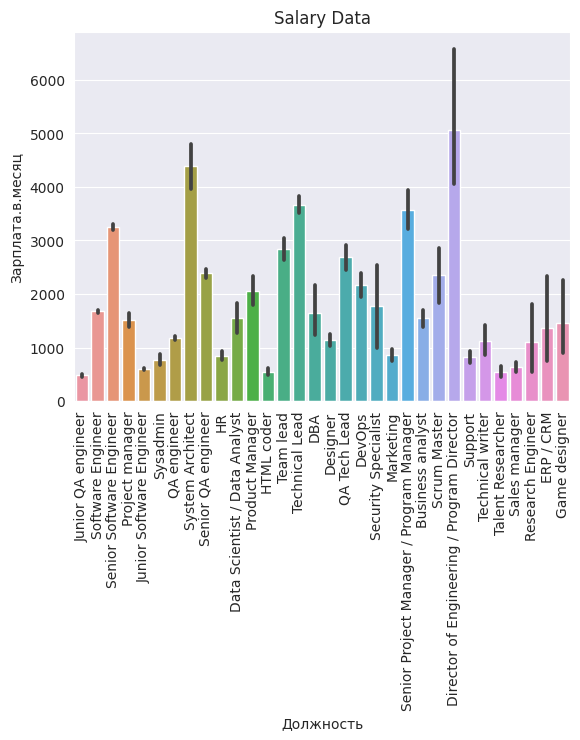

In [107]:
plot = sns.barplot(orient='v', y='Зарплата.в.месяц', x='Должность', data=base_df)
plot.tick_params(axis='x', rotation=90)
plot.set(title='Salary Data')

[Text(0.5, 1.0, 'Python Salary Data')]

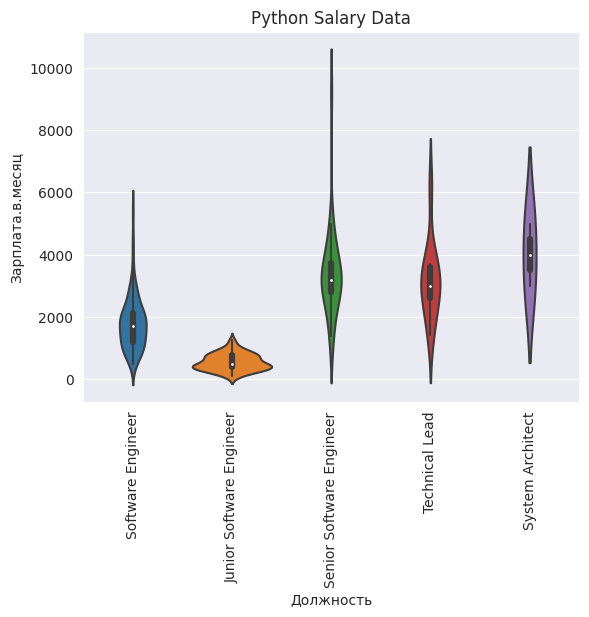

In [108]:
plot = sns.violinplot(orient='v', y='Зарплата.в.месяц', x='Должность', data=python_data)
plot.tick_params(axis='x', rotation=90)
plot.set(title='Python Salary Data')